In [3]:
import matplotlib.pyplot as plt
import numpy as np

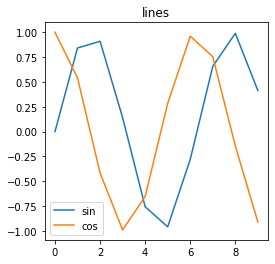

In [12]:
plt.figure(figsize=(4, 4))# figure方法用于创建一个空白画布,figsize属性表示画布的大小
x = np.arange(10)
plt.title("lines")  # 绘图的标题 
plt.plot(x, np.sin(x))  # plot绘折线图，横坐标为x,纵坐标为sin x
plt.plot(x, np.cos(x))
plt.legend(["sin", "cos"])  # 添加图例，一般添加在绘图之后，指明第一个画的线是sin x，第二个画的线是cos x
plt.savefig("./tmp/tmp.png")  # 将绘制的图片保存到指定的位置，一般的顺序是先保存图片再展示图片
plt.show()  # 图形展示

In [40]:
data = np.load("../day06/data/data/国民经济核算季度数据.npz", allow_pickle = True)
data.files
columns = data["columns"]
values = data["values"]
print(columns)
print(values)

['序号' '时间' '国内生产总值_当季值(亿元)' '第一产业增加值_当季值(亿元)' '第二产业增加值_当季值(亿元)'
 '第三产业增加值_当季值(亿元)' '农林牧渔业增加值_当季值(亿元)' '工业增加值_当季值(亿元)' '建筑业增加值_当季值(亿元)'
 '批发和零售业增加值_当季值(亿元)' '交通运输、仓储和邮政业增加值_当季值(亿元)' '住宿和餐饮业增加值_当季值(亿元)'
 '金融业增加值_当季值(亿元)' '房地产业增加值_当季值(亿元)' '其他行业增加值_当季值(亿元)']
[[1 '2000年第一季度' 21329.9 ... 1235.9 933.7 3586.1]
 [2 '2000年第二季度' 24043.4 ... 1124.0 904.7 3464.9]
 [3 '2000年第三季度' 25712.5 ... 1170.4 1070.9 3518.2]
 ...
 [67 '2016年第三季度' 190529.5 ... 15472.5 12164.1 37964.1]
 [68 '2016年第四季度' 211281.3 ... 15548.7 13214.9 39848.4]
 [69 '2017年第一季度' 180682.7 ... 17213.5 12393.4 42443.1]]


### 散点图

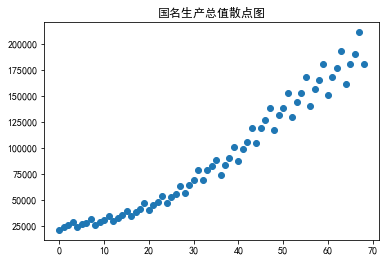

In [51]:
# scatter用于绘制散点图，第一个属性表示x的值，第二个属性表示y的值
#下列两行解决标题中文显示问题
plt.rcParams['font.sans-serif']=['SimHei']
plt.rcParams['axes.unicode_minus'] = False
plt.title("国民生产总值散点图")
plt.scatter(range(69), data["values"][:, 2])  # data["values"][:, 2]表示所有数组中下标为2的元素
plt.show()

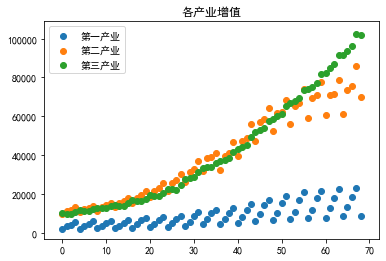

In [55]:
for i in [3, 4, 5]:  # 使用for循环画多个散点图
    plt.title("各产业增值")
    plt.scatter(range(69), data["values"][:, i])
    plt.legend(["第一产业", "第二产业", "第三产业"])
plt.show()

### 折线图

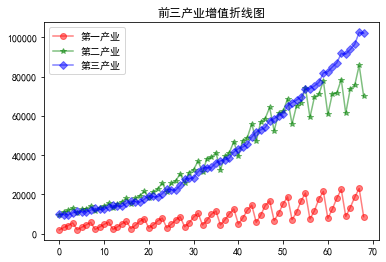

In [60]:
plt.title("前三产业增值折线图")
l = ["r", "g", "b"]  # 颜色列表，分别表示为红、绿、蓝
m = ["o", "*", "D"]  # 点的形状列表，分别表示为原点、星号、菱形
# enumerate函数可以返回后面遍历对象的下标，及下标的值给j，元素的值给i
for j, i in enumerate([3, 4, 5]):  
    plt.plot(range(69), data["values"][:, i], c = l[j], marker = m[j], alpha = 0.5)
    # c属性表示颜色，marker属性表示形状，alpha属性表示线条的透明度
plt.legend(["第一产业", "第二产业", "第三产业"])
plt.show()

### 直方图

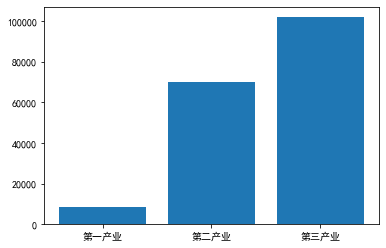

In [64]:
num = data["values"][68, 3: 6]
plt.bar(range(len(num)), num)  # bar方法用于创建直方图，这两个属性分别确定横坐标和纵坐标
plt.xticks(range(len(num)), ["第一产业", "第二产业", "第三产业"])  # xticks修改x中刻度的数值
plt.show()

### 饼图

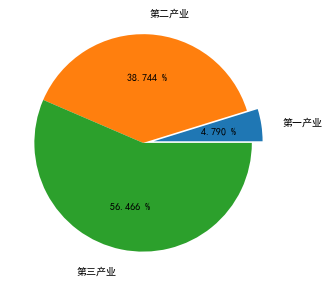

In [77]:
plt.figure(figsize=(5, 5))  # 设置长和宽为5的画布，会改变饼图的显示大小
plt.pie(num, autopct="%0.3f %%", explode=[0.1, 0, 0], labels=["第一产业", "第二产业", "第三产业"], 
       labeldistance= 1.2)  
# labeldistance属性表示标签的内容距离圆心的距离为1.2，默认为1
# labels属性是添加标签
# pie方法用于创建一个饼图，num时饼图的内容，会根据不同的数据自动分割饼图的大小
# autopct属性可以在饼图上对应的数据部分显示内容，%0.3f表示将原有数据保留三位小数后显示，%%会显示一个%
# explode属性可以将饼图的指定部分向外延伸，0表示不延伸，这里0.1表示将第一个数据内容的饼图向外延伸(也就是距离圆心向外多0.1)
plt.show()

### 箱线图

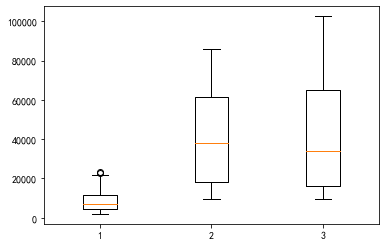

In [81]:
num = data["values"][:, [3, 4, 5]]
plt.boxplot(num)  # boxplot方法用于创建箱线图
plt.show()